<a href="https://www.kaggle.com/code/eavprog/abscur-svyas-valut?scriptVersionId=163978294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Связь валют на графах через корреляцию

[**Оглавление проекта "Абсолютные валютные курсы"**](https://docs.google.com/spreadsheets/d/1UgC2NfKtKJPaXglsmVJET7Xnp2ZtOzJgKD9DN-VGFA8/edit#gid=77497797)

Данные для настоящего расчета берутся из тетрадки [**Источник данных для проекта "Абсолютные валютные курсы"**](https://www.kaggle.com/code/eavprog/abscur-data).

В настоящем расчете:
- Вычисляем относительные изменения для каждого абсолютного курса.
- Смотрим на связанность по корреляции.
- Отсекаем по корреляции га уровня= от 0,6 до 0.9 (чтобы в экран умещалась).
- Данные выкладываем на граф.

In [18]:
import pandas as pd
import numpy as np
from graphviz import Graph
import matplotlib.pyplot as plt
import datetime
import abscur_menu
import abscur_post as ap

# загрузка истории абсолютных курсов
abscur = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col=0,parse_dates=True)

# печать меню проекта
abscur_menu.print_menu()

cnt = 0
imgs = []
texts = []

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За 5 лет

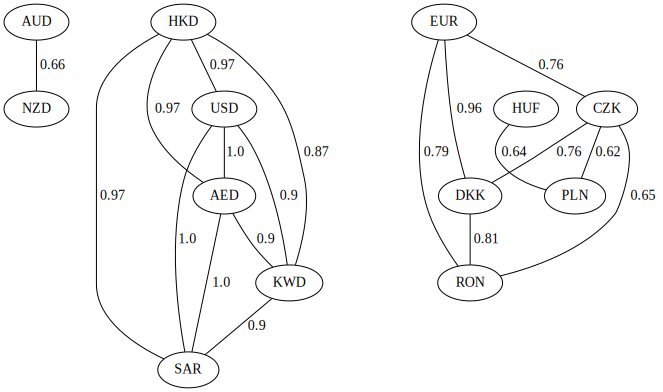

In [19]:
d_data = abscur.pct_change()
d_data_corr = d_data.corr()

g = Graph(name='corr_graph_5y',format='png')

for i1 in range(len(d_data_corr.columns)):
    for i2 in range(len(d_data_corr.columns)):
        if(i2>i1):
            if(abs(d_data_corr.iloc[i1,i2])>0.6):
                c1 = d_data_corr.columns.values[i1]
                c2 = d_data_corr.columns.values[i2]
                g.edge(c1, c2,str(np.round(d_data_corr.iloc[i1,i2],2)))

imgs.append(g.render(str(cnt)))
texts.append('Связь валют на графах через корреляцию за последние 5 лет')
cnt += 1
g

# За 3 года

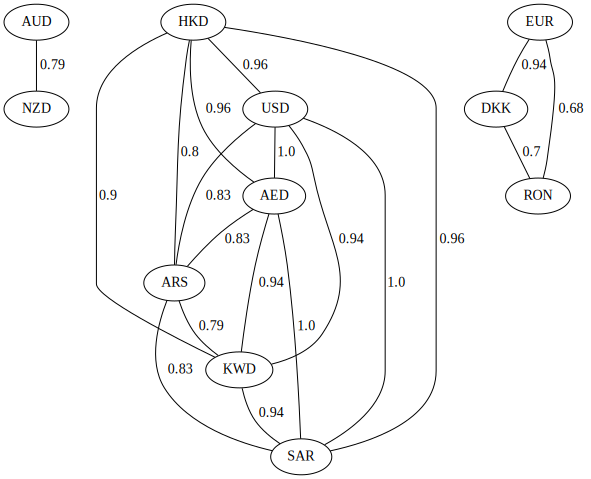

In [20]:
_d_data_corr = abscur[abscur.index > str(datetime.date.today()-datetime.timedelta(days=365*3))].pct_change().corr()

g = Graph(name='corr_graph_1y',format='png')
for i1 in range(len(_d_data_corr.columns)):
    for i2 in range(len(_d_data_corr.columns)):
        if(i2>i1):
            if(abs(_d_data_corr.iloc[i1,i2])>0.65):
                c1 = _d_data_corr.columns.values[i1]
                c2 = _d_data_corr.columns.values[i2]
                g.edge(c1, c2,str(np.round(_d_data_corr.iloc[i1,i2],2)))
imgs.append(g.render(str(cnt)))
texts.append('Связь валют на графах через корреляцию за последние 3 года')
cnt += 1
g

# За 1 год

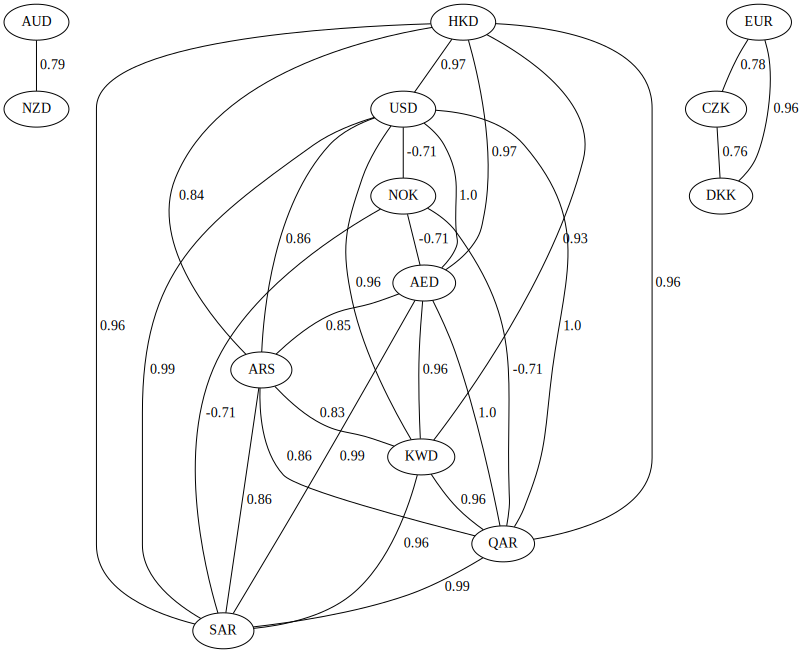

In [21]:
_d_data_corr = abscur[abscur.index > str(datetime.date.today()-datetime.timedelta(days=365))].pct_change().corr()

g = Graph(name='corr_graph_1y',format='png')
for i1 in range(len(_d_data_corr.columns)):
    for i2 in range(len(_d_data_corr.columns)):
        if(i2>i1):
            if(abs(_d_data_corr.iloc[i1,i2])>0.7):
                c1 = _d_data_corr.columns.values[i1]
                c2 = _d_data_corr.columns.values[i2]
                g.edge(c1, c2,str(np.round(_d_data_corr.iloc[i1,i2],2)))
imgs.append(g.render(str(cnt)))
texts.append('Связь валют на графах через корреляцию за последний год')
cnt += 1
g

# За полгода

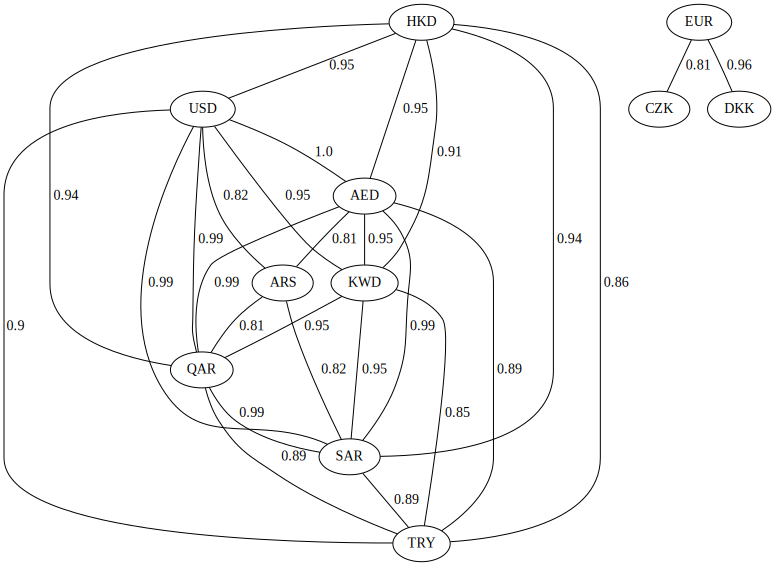

In [22]:
_d_data_corr = abscur[abscur.index > str(datetime.date.today()-datetime.timedelta(days=182))].pct_change().corr()

g = Graph(name='corr_graph_1y',format='png')
for i1 in range(len(_d_data_corr.columns)):
    for i2 in range(len(_d_data_corr.columns)):
        if(i2>i1):
            if(abs(_d_data_corr.iloc[i1,i2])>0.8):
                c1 = _d_data_corr.columns.values[i1]
                c2 = _d_data_corr.columns.values[i2]
                g.edge(c1, c2,str(np.round(_d_data_corr.iloc[i1,i2],2)))

imgs.append(g.render(str(cnt)))
texts.append('Связь валют на графах через корреляцию за последние полгода')
cnt += 1
g

# За квартал

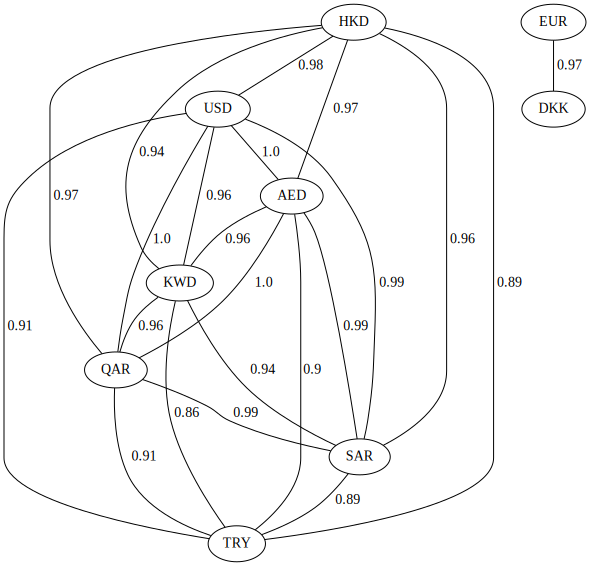

In [23]:
_d_data_corr = abscur[abscur.index > str(datetime.date.today()-datetime.timedelta(days=92))].pct_change().corr()

g = Graph(name='corr_graph_1y',format='png')
for i1 in range(len(_d_data_corr.columns)):
    for i2 in range(len(_d_data_corr.columns)):
        if(i2>i1):
            if(abs(_d_data_corr.iloc[i1,i2])>0.85):
                c1 = _d_data_corr.columns.values[i1]
                c2 = _d_data_corr.columns.values[i2]
                g.edge(c1, c2,str(np.round(_d_data_corr.iloc[i1,i2],2)))
imgs.append(g.render(str(cnt)))
texts.append('Связь валют на графах через корреляцию за последний квартал')
cnt += 1
g

In [26]:
num = np.random.randint(cnt)
ap.send_img_and_text(imgs[num],texts[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-svyas-valut")

['Связь валют на графах через корреляцию за последние 5 лет',
 'Связь валют на графах через корреляцию за последние 3 года',
 'Связь валют на графах через корреляцию за последний год',
 'Связь валют на графах через корреляцию за последние полгода',
 'Связь валют на графах через корреляцию за последний квартал']